<a href="https://colab.research.google.com/github/SwapnilIITT/Model-Internship-Diagonal-Matrix/blob/main/Model1_DT_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Individual_dataset_modified_2.xlsx.csv")
df

<ipython-input-6-7170c871c568>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Individual_dataset_modified_2.xlsx.csv")


,First Name,Last name,Middel,D.O.B,Nationality(/ies),Town of birth,Country of birth,SOW,Product,Cooperative,...,High value,Cash payment,payment from 3rd party,transaction does Not match with ecoNomic profile,Payment send/recived from high risk countries,Payment through Virtual assets,Final_Low,Final_Medium,Final_High,Final
0,AHMED SHAH,OBAIDULLAH,NoORZAI,31No48,Pakistan,Quetta,Pakistan,Employment (Self-employed),Treasury Services,YES,...,NO,NO,NO,NO,NO,NO,18,6,9,5
1,ABD,AZZOUZ,AL-BASET,24145,Libya,Doma,Libya,Insurance Proceeds/Settlement,Accounting,YES,...,NO,NO,NO,NO,NO,NO,17,5,9,5
2,ABD ALLAH,ABDEL RAHMAN,MOHAMED,21127,Egypt,Kafr Al-Shaykh,Egypt,Divorce Settlement,Investment Insights,YES,...,NO,NO,NO,NO,NO,NO,17,4,10,5
3,ABDELHALIM,REMADNA,HAFED,24199,Algeria,Biskra,Algeria,Investment Income/Returns,Software and Information Solutions,YES,...,NO,NO,NO,NO,NO,NO,17,4,8,5
4,ABDELKADER,LAAGOUB,No,2422No,Morocco,Casablanca,Morocco,Winnings (Government Lottery),Investment Operations Outsourcing,YES,...,NO,NO,NO,NO,NO,YES,17,6,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,YES,NO,NO,NO,YES,NO,0,0,15,5
20057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,YES,NO,NO,YES,YES,NO,0,0,8,5
20058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,NO,YES,YES,NO,NO,YES,0,0,13,5
20059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,NO,YES,NO,NO,YES,NO,0,0,13,5


In [7]:
X= df.iloc[:,67:70]
print(X)
print(X.info)

       Final_Low  Final_Medium  Final_High
0             18             6           9
1             17             5           9
2             17             4          10
3             17             4           8
4             17             6          11
...          ...           ...         ...
20056          0             0          15
20057          0             0           8
20058          0             0          13
20059          0             0          13
20060          0             0          14

[20061 rows x 3 columns]
<bound method DataFrame.info of        Final_Low  Final_Medium  Final_High
0             18             6           9
1             17             5           9
2             17             4          10
3             17             4           8
4             17             6          11
...          ...           ...         ...
20056          0             0          15
20057          0             0           8
20058          0             0         

In [8]:
Y = df.iloc[:,70]
Y

0        5
1        5
2        5
3        5
4        5
        ..
20056    5
20057    5
20058    5
20059    5
20060    5
Name: Final, Length: 20061, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42, test_size = 0.3)
X_df = df.iloc[:,67:71]
X_df
print(X_df.info)

<bound method DataFrame.info of        Final_Low  Final_Medium  Final_High  Final
0             18             6           9      5
1             17             5           9      5
2             17             4          10      5
3             17             4           8      5
4             17             6          11      5
...          ...           ...         ...    ...
20056          0             0          15      5
20057          0             0           8      5
20058          0             0          13      5
20059          0             0          13      5
20060          0             0          14      5

[20061 rows x 4 columns]>


In [10]:
import plotly.express as px
fig = px.scatter_3d(X_df, x='Final_Low', y='Final_Medium', z='Final_High',
              color='Final')
fig.show()

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT = DecisionTreeClassifier(max_depth = 2)
DT = DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.9998338594450905


In [12]:
X_df1 = ["Final_low","Final_Medium","Final_High"]
X_df2 = ["1","3","5"]

[Text(0.6, 0.8333333333333334, 'Final_High <= 2.0\ngini = 0.559\nsamples = 14042\nvalue = [2813, 2791, 8438]\nclass = 5'),
 Text(0.4, 0.5, 'Final_Medium <= 0.5\ngini = 0.5\nsamples = 5604\nvalue = [2813, 2791, 0]\nclass = 1'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2813\nvalue = [2813, 0, 0]\nclass = 1'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2791\nvalue = [0, 2791, 0]\nclass = 3'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 8438\nvalue = [0, 0, 8438]\nclass = 5')]

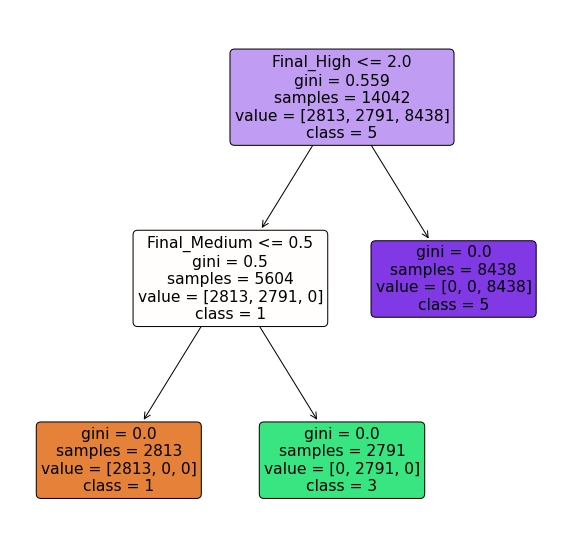

In [13]:
plt.figure(figsize=(10,10))
tree.plot_tree(DT,class_names = X_df2,feature_names = X_df1,filled = True,rounded = True)

In [14]:
#Give the value of the data in form of the matrix with Yes and No.
n = 58 # The torla number of columms
a = []
for i in range(n):
  print("For the row ",j)
  a.append(str(input("Enter in terms of YES and NO:")))


NameError: ignored

In [ ]:
for i in range(58):
  if(a[i]=="YES"):
    a[i] = 1
  else:
    a[i] = 0


In [ ]:
count_1 = 0
count_2 = 0
count_3 = 0
for i in range(0,18):
  count_1+=a[i]
for i in range(18,30):
  count_2+=a[i];
for i in range(30,58):
  count_3+=a[i];
print(count_1)
print(count_2)
print(count_3)

In [ ]:
Y_to_check = np.array([[count_1,count_2,count_3]])
print(Y_to_check)
Y_predicted = DT.predict(Y_to_check)
print(Y_predicted)

In [ ]:
if(Y_predicted==[5]):
  print("High Risk")
elif(Y_predicted==[3]):
  print("Medium Risk")
else:
  print("Low Risk")

In [15]:
import pickle

In [16]:
filename = 'finalized_model.sav'
pickle.dump(DT, open(filename, 'wb'))